In [1]:
library(ape)
library(phangorn)
library(Matrix)
library(tidyverse)
library(ggtree)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x tidyr::pack()   masks Matrix::pack()
x tidyr::unpack() masks Matrix::unpack()

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

ggtree v3.2.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics. 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated 

In [7]:
seq_len <- 100
pop_size <- 1000
Q <- matrix(c(-1, 1, 1, -1), nrow = 2, ncol = 2)
bases <- c("x", "y")
colnames(Q) <- bases
rownames(Q) <- bases


base_pairs <- expand.grid(bases, bases)
base_pairs <- paste0(base_pairs[,1], base_pairs[,2])

u <- 0.01
#pi <- rep(0.25, 4)
#names(pi) <- bases
#kappa <- 0.7

Qco <- matrix(nrow = 4, ncol = 4)

coev_factor <- 100
colnames(Qco) <- base_pairs
rownames(Qco) <- base_pairs

coev_pair <- c("yy")

In [8]:
# siteA is independantly evolving
# siteB is following siteA
for (i in 1:nrow(Qco)) {
    for (j in 1:ncol(Qco)) {
        # skip if there is no change on either sites
        if (i == j) {
            next
        }
        siteA_change <- c(strsplit(base_pairs[i], "")[[1]][1], strsplit(base_pairs[j], "")[[1]][1])
        siteB_change <- c(strsplit(base_pairs[i], "")[[1]][2], strsplit(base_pairs[j], "")[[1]][2])

        # treat changes in both sites simultaneously as impossible to happen
        if (siteA_change[1] != siteA_change[2] && siteB_change[1] != siteB_change[2]) {
            Qco[i, j] <- 0
            next
        }

        # treat one site changes as the changes in the independant model
        # first, get the changing base
        base_change <- NA
        if (siteA_change[1] != siteA_change[2]) {
            base_change <- siteA_change
            # if the change is at siteA, and not at siteB, then this element is not influence by coev pair because siteA evolve idependantly
            Qco[i, j] <- Q[base_change[1], base_change[2]]
            next
        } else {
            base_change <- siteB_change
        }
        # get the rate of this chanage
        Qco[i, j] <- Q[base_change[1], base_change[2]]

        # now, consider if coevolution should be consider
        if (base_pairs[i] %in% coev_pair) {
            Qco[i, j] <- Qco[i, j] / coev_factor
        } else if (base_pairs[j] %in% coev_pair) {
            Qco[i, j] <- Qco[i, j] * coev_factor
        }
    }
}


for (i in 1:nrow(Qco)) {
    Qco[i, i] <- -1 * sum(Qco[i, ], na.rm = T)
}


In [10]:
Qco3 <- matrix(nrow = 8, ncol = 8)
base_tri <- expand.grid(bases, bases, bases)
base_tri <- paste0(base_tri[,1], base_tri[,2], base_tri[,3])
colnames(Qco3) <- base_tri
rownames(Qco3) <- base_tri
siteAB_coev_pair <- "yy"
siteBC_coev_pair <- "yy"
for (i in 1:nrow(Qco3)) {
    for (j in 1:ncol(Qco3)) {
        # skip if there is no change
        if (i == j) {
            next
        }
        siteA_change <- c(strsplit(base_tri[i], "")[[1]][1], strsplit(base_tri[j], "")[[1]][1])
        siteB_change <- c(strsplit(base_tri[i], "")[[1]][2], strsplit(base_tri[j], "")[[1]][2])
        siteC_change <- c(strsplit(base_tri[i], "")[[1]][3], strsplit(base_tri[j], "")[[1]][3])

        siteA_is_change <- as.numeric(siteA_change[1] == siteA_change[2])
        siteB_is_change <- as.numeric(siteB_change[1] == siteB_change[2])
        siteC_is_change <- as.numeric(siteC_change[1] == siteC_change[2])

        # treat changes in >2 sites simultaneously as impossible to happen
        if (siteA_is_change + siteB_is_change + siteC_is_change >= 2) {
            Qco[i, j] <- 0
            next
        }

        # consider siteA change, this site is changing in independantly from other sites
        if (siteA_change == 1) {
            Qco3[i, j] <- Q[siteA_change[1], siteB_change[2]]
            next
        }

        # consider siteB change, this site is dependant on the second site
        if (siteB_change == 1) {
            # get the bases that siteA and B are changing into
            baseAB <- paste0(siteA_change[2], siteB_change[2])
            if (baseAB %in% )
        }
        # first, get the changing base
        base_change <- NA
        if (siteA_change[1] != siteA_change[2]) {
            base_change <- siteA_change
            # if the change is at siteA, and not at siteB, then this element is not influence by coev pair because siteA evolve idependantly
            Qco[i, j] <- Q[base_change[1], base_change[2]]
            next
        } else {
            base_change <- siteB_change
        }
        # get the rate of this chanage
        Qco[i, j] <- Q[base_change[1], base_change[2]]

        # now, consider if coevolution should be consider
        if (base_pairs[i] %in% coev_pair) {
            Qco[i, j] <- Qco[i, j] / coev_factor
        } else if (base_pairs[j] %in% coev_pair) {
            Qco[i, j] <- Qco[i, j] * coev_factor
        }
    }
}


for (i in 1:nrow(Qco)) {
    Qco[i, i] <- -1 * sum(Qco[i, ], na.rm = T)
}



[1] "xxx" "yxx" "xyx" "yyx" "xxy" "yxy" "xyy" "yyy"

In [49]:

simseq <- function(tree, start_seq, levs, Q, cur_node = length(tree$tip.label) + 1, result = list(), head_run = T) {
    # get the starting state for each base in the sequence
    seq_states <- map(start_seq, function(cur_base) {
        as.numeric(cur_base == levs)
    })
    seq_states <- do.call(cbind, seq_states) #each column is the state of a base
    children <- Children(tree, cur_node)
    for (child in children) {
        # get branch length
        branch_len <- tree$edge.length[which(tree$edge[, 2] == child)]
        child_seq <- map_chr(1:ncol(seq_states), function(i) {
            # get the probability of the state after time t (the parent branch length)
            cur_state <- seq_states[, i]
            state_dist <- cur_state %*% expm(branch_len*Q)
            # get the base of the child based on the distribution
            cur_base <- sample(levs, 1, prob = as.vector(state_dist))
            return(cur_base)
        })
        if (child > length(tree$tip.label)) {
            # has not reach tip yet, go down another level
            result <- simseq(tree, child_seq, levs, Q, child, result, F)
        } else {
            node_name <- tree$tip.label[child]
            result[[node_name]] <- child_seq
        }
    }
    if (head_run) {
        # get the result into table format before output
        result_names <- names(result)
        result <- do.call(rbind, result)
        rownames(result) <- result_names
        result[match(tree$tip.label, rownames(result)), ]
    }
    return(result)
}




In [50]:
hbv_tree <- read.tree("~/hbv_covar3/analysis/phylo_build/RAxML_bestTree.HBVA_withOutGroup_tree")
tree <- rtree(pop_size, rooted = T)
tree$edge.length <- sample(hbv_tree$edge.length, length(tree$edge.length), replace = TRUE)
sim_result_coev <- simseq(tree, c("xx"), base_pairs, Qco)



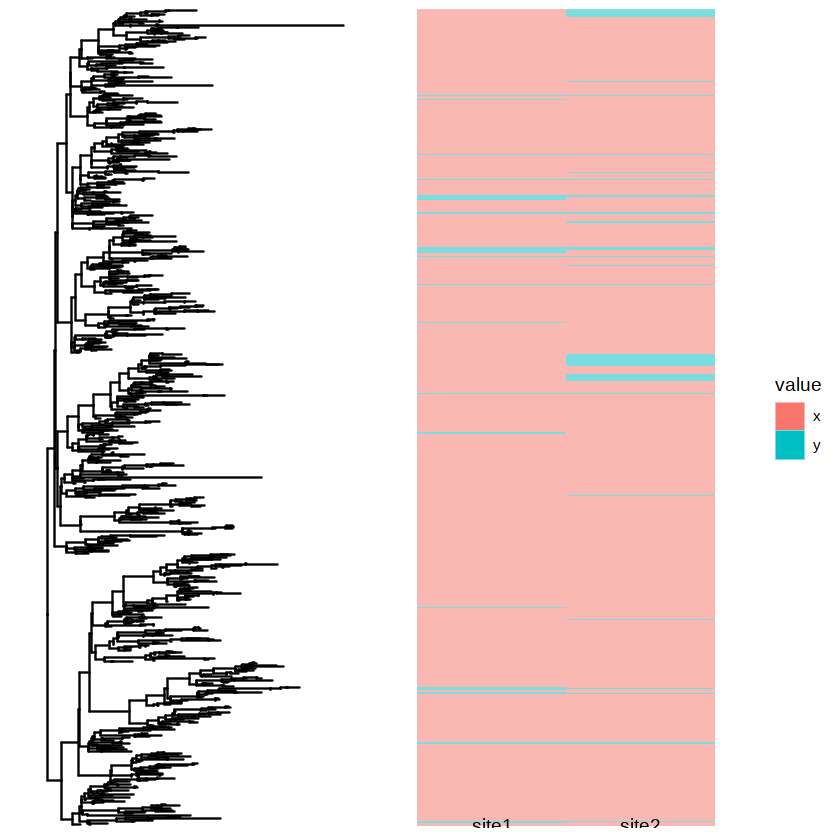

In [51]:
# plot result
data = as.data.frame(sim_result_coev)
colnames(data) <- "sequence"
data$site1 <- map_chr(strsplit(data$sequence, ""), 1)
data$site2 <- map_chr(strsplit(data$sequence, ""), 2)
p <- ggtree(tree)
gheatmap(p, data = data[, c("site1", "site2")])


msa <- data[, c("site1", "site2")]



## Anc reconstruction

In [52]:
library(progress)

message("performing ancestral state reconstruction...")
site_ids <- colnames(msa)
anc_restruct <- list()
pb <- progress_bar$new(total = length(site_ids))
for (site_id in site_ids) {
    pb$tick() # update progress
    Sys.sleep(1 / length(site_ids))
    site <- as.numeric(gsub("site", "", site_id))
    site_aas <- msa[, site]
    names(site_aas) <- rownames(msa)
    site_aas_matched <- site_aas[tree$tip.label]
    if (length(table(site_aas_matched)) == 1) next
    ace_result <- ace(site_aas_matched,
        tree,
        type = "discrete",
        method = "ML"
    )
    # add states informatino for tip nodes to anc restruct result
    tip_nodes_lik_anc <- map(site_aas_matched, function(x) {
        ifelse(colnames(ace_result$lik.anc) == x, 1, 0)
    })
    tip_nodes_lik_anc <- do.call(rbind, tip_nodes_lik_anc)
    ace_result$lik.anc <- rbind(tip_nodes_lik_anc, ace_result$lik.anc)
    anc_restruct[[site_id]] <- ace_result
}



performing ancestral state reconstruction...



## Get homoplasy

In [53]:
library(phangorn)
library(foreach)
library(doParallel)

In [54]:
allele_presense_threshold <- 0.7
allele_empty_threshold <- 0.3
ncores <- 10

registerDoParallel(ncores)
allele_switch <- foreach(
    site_id = names(anc_restruct),
    .combine = "c"
) %dopar% {
    message(site_id)
    site <- as.numeric(gsub("site", "", site_id))
    cur_anc_restruct <- anc_restruct[[site_id]]$lik.anc
    cur_switch_allele_tb <- matrix(NA,
        nrow = nrow(cur_anc_restruct),
        ncol = ncol(cur_anc_restruct)
    )
    colnames(cur_switch_allele_tb) <- colnames(cur_anc_restruct)
    for (node in seq_len(tree$Nnode + Ntip(tree))) {
        # get current node state
        cur_state <- cur_anc_restruct[node, ]
        if (NA %in% cur_state) next
        # get parent node state
        parent_node <- Ancestors(tree, node, "parent")
        if (parent_node == 0) next
        parent_state <- cur_anc_restruct[parent_node, ]
        # identify switch
        is_disappear <- (parent_state > allele_presense_threshold &
            cur_state < allele_empty_threshold)
        is_appear <- (parent_state < allele_empty_threshold &
            cur_state > allele_presense_threshold)
        is_switch <- is_disappear | is_appear
        cur_switch_allele_tb[node, ] <- is_switch
    }
    result <- list()
    result[[site_id]] <- cur_switch_allele_tb
    result
}

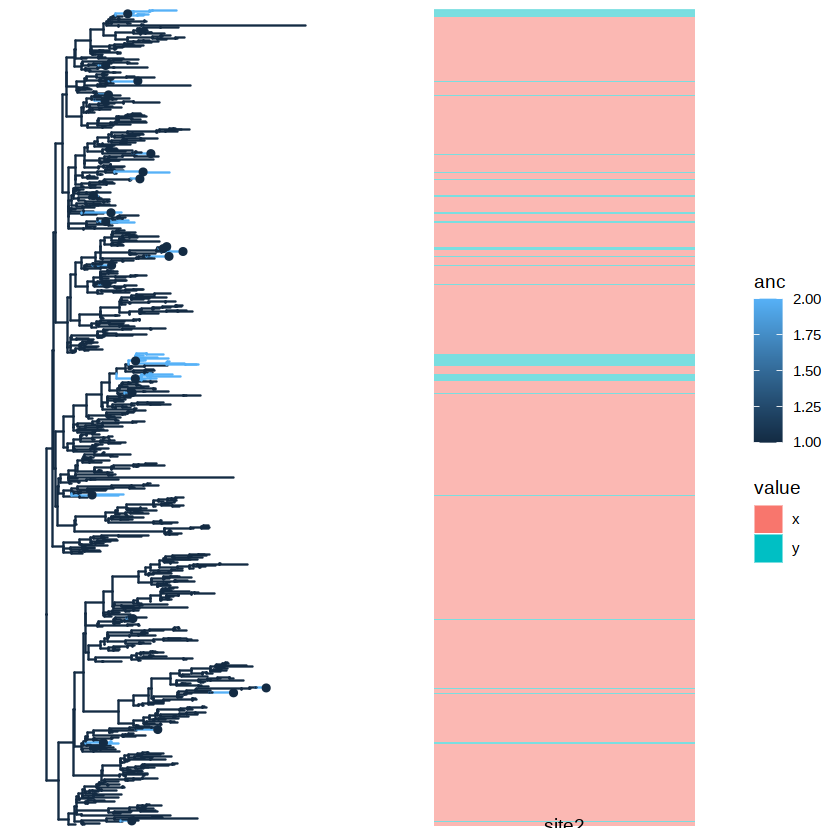

In [55]:
# plot result
options(repr.plot.width=7, repr.plot.height=7)
data = as.data.frame(sim_result_coev)
colnames(data) <- "sequence"
data$site2 <- map_chr(strsplit(data$sequence, ""), 2)
color_data <- data.frame(node = 1:nrow(anc_restruct$site1$lik.anc),
    anc = apply(anc_restruct$site2$lik.anc, 1, which.max),
    switch = ifelse(rowSums(allele_switch$site2) > 0, 1, 0))
p <- ggtree(tree) %<+% color_data + aes(color=anc) + geom_point2(aes(color = switch, subset = (switch == 1)))

gheatmap(p, data = data[, c("site2"), drop = F])


## GLM search

In [56]:
library(seqinr)
library(glmnet)
library(SIS)
library(doParallel)
library(foreach)
library(itertools)

args <- commandArgs(trailingOnly = TRUE)
ncores <- 10
setwd("~/hbv_covar3/")
lg <- list()
lg$genotype <- args[1]
lg$genes <- c("C", "P", "S", "X")

# filter out alleles that do not need to be considered
allele_switch_qced <- allele_switch
rm_ind <- vector()
lg$gap_filter_record <- vector()
lg$switch_cnt_allele_filtered <- vector()
lg$switch_cnt_site_filtered <- vector()
for (i in seq_len(length(allele_switch))) {
    site_id <- names(allele_switch)[i]
    # can't have 99% site as gap
    site <- as.numeric(gsub("site", "", site_id))
    site_aa <- msa[, site]
    names(site_aa) <- rownames(msa)
    site_aa_matched <- site_aa[tree$tip.label]
    site_freq <- table(site_aa) / length(site_aa)
    if ("-" %in% names(site_freq)) {
        if (site_freq["-"] > 0.99) {
            rm_ind <- c(rm_ind, i)
            lg$gap_filter_record <- c(lg$gap_filter_record, site_id)
            next
        }
    }
    # an allele need to have at least 3 switches
    cur_allele_switch <- allele_switch_qced[[site_id]]
    switch_cnt <- apply(cur_allele_switch, 2, function(x) sum(x, na.rm = T))
    if (length(which(switch_cnt <= 2)) != 0) {
        rm_id <- paste0(
            site_id,
            "_",
            colnames(cur_allele_switch)[which(switch_cnt <= 2)]
        )
        lg$switch_cnt_filter_record <- c(lg$switch_cnt_filter_record, rm_id)
        allele_switch_qced[[site_id]] <- cur_allele_switch[, switch_cnt >= 3, drop = F]
    }
    if (ncol(allele_switch_qced[[site_id]]) == 0) {
        lg$switch_cnt_site_filtered <- c(lg$switch_cnt_site_filtered, site_id)
        rm_ind <- c(rm_ind, i)
    }
}
if (length(rm_ind) > 0) {
    allele_switch_qced <- allele_switch_qced[-rm_ind]
}

site_switch <- map(allele_switch_qced, function(x) {
    apply(x, 1, any)
})

In [57]:
# get tree length
nodes_n <- tree$Nnode + length(tree$tip.label)
root_node <- setdiff(1:nodes_n, tree$edge[, 2])
edge_length <- rep(NA, nodes_n)
edge_length[tree$edge[, 2]] <- tree$edge.length

result <- foreach(chunk = iterate_chunks) %dopar% {
    cur_result <- list()
    for (i in chunk) {
        site_id <- names(site_switch)[i]
        message(i)
        # fuse the nodes together
        site_switch_fused <- site_switch
        dep_sites <- names(site_switch_fused)[-which(names(site_switch_fused) %in% site_id)]
        dep_sites <- do.call(cbind, site_switch_fused[dep_sites])
        dep_sites <- apply(dep_sites, 2, as.numeric)
        data <- cbind(site_switch[[site_id]], edge_length, dep_sites)
        # remove cols/rows with too many NA
        rm_row <- unlist(apply(data, 1, function(x) {
            freq <- sum(is.na(x)) / length(x)
            if (freq > 0.1) {
                return(T)
            } else {
                return(F)
            }
        }))

        rm_col <- unlist(apply(data, 2, function(x) {
            freq <- sum(is.na(x)) / length(x)
            if (freq > 0.1) {
                return(T)
            } else {
                return(F)
            }
        }))
        if (length(rm_row)) {
            data <- data[!(rm_row), !(rm_col)]
        }
        y <- data[, 1]
        x <- data[, -1, drop = F]
        mysd <- function(y) sqrt(sum((y - mean(y))^2) / length(y))
        sx <- scale(x, scale = apply(x, 2, mysd))
        start_lambda <- max(abs(colSums(sx * y))) / nrow(x)
        # add 100 lambdas before start lambda for warm up
        lambdas <- map_dbl(1:100, function(i) start_lambda * (1 / 0.99)^(i - 1))
        lambdas <- c(lambdas, map_dbl(1:687, function(i) start_lambda * (0.99)^(i - 1)))
        lambdas <- sort(lambdas)
        cur_result[[site_id]] <- glmnet(data[, -1], data[, 1], family = "binomial", lambda = lambdas)
        # select beta via ebic
        ebic <- map_dbl(1:length(cur_result[[site_id]]$lambda), function(j) {
            lambda <- cur_result[[site_id]]$lambda[j]
            cur_ebic <- deviance(cur_result[[site_id]])[j] +
                sum(cur_result[[site_id]]$beta[, j] != 0) * log(nrow(data)) +
                2 * log(choose(ncol(data[, -1]), sum(cur_result[[site_id]]$beta[, j] != 0)))
        })
        message(length(ebic))
        message("hi")
        min.ind <- which.min(ebic)
        beta_col <- cur_result[[site_id]]$beta[, min.ind]
        beta <- names(beta_col)[which(beta_col != 0)]
        message(beta)
        cur_result[[site_id]]$selected_beta <- beta
    }
    return(cur_result)
}

result <- unlist(result, recursive = F)


#saveRDS(result, paste0("./analysis/lasso_covar_hbv", lg$genotype, ".rds"))

In [58]:
# get tree length
nodes_n <- tree$Nnode + length(tree$tip.label)
root_node <- setdiff(1:nodes_n, tree$edge[, 2])
edge_length <- rep(NA, nodes_n)
edge_length[tree$edge[, 2]] <- tree$edge.length

cur_result <- list()

    for (i in 1:2) {
        site_id <- names(site_switch)[i]
        # fuse the nodes together
        site_switch_fused <- site_switch
        dep_sites <- names(site_switch_fused)[-which(names(site_switch_fused) %in% site_id)]
        dep_sites <- do.call(cbind, site_switch_fused[dep_sites])
        dep_sites <- apply(dep_sites, 2, as.numeric)
        data <- cbind(site_switch[[site_id]], edge_length, dep_sites)
        # remove cols/rows with too many NA
        rm_row <- unlist(apply(data, 1, function(x) {
            freq <- sum(is.na(x)) / length(x)
            if (freq > 0.1) {
                return(T)
            } else {
                return(F)
            }
        }))

        rm_col <- unlist(apply(data, 2, function(x) {
            freq <- sum(is.na(x)) / length(x)
            if (freq > 0.1) {
                return(T)
            } else {
                return(F)
            }
        }))
        if (length(rm_row)) {
            data <- data[!(rm_row), !(rm_col)]
        }
        y <- data[, 1]
        x <- data[, -1, drop = F]
        mysd <- function(y) sqrt(sum((y - mean(y))^2) / length(y))
        sx <- scale(x, scale = apply(x, 2, mysd))
        start_lambda <- max(abs(colSums(sx * y))) / nrow(x)
        # add 100 lambdas before start lambda for warm up
        lambdas <- map_dbl(1:100, function(i) start_lambda * (1 / 0.99)^(i - 1))
        lambdas <- c(lambdas, map_dbl(1:687, function(i) start_lambda * (0.99)^(i - 1)))
        lambdas <- sort(lambdas)
        cur_result[[site_id]] <- glmnet(data[, -1], data[, 1], family = "binomial", lambda = lambdas)
        # select beta via ebic
        ebic <- map_dbl(1:length(cur_result[[site_id]]$lambda), function(j) {
            lambda <- cur_result[[site_id]]$lambda[j]
            cur_ebic <- deviance(cur_result[[site_id]])[j] +
                sum(cur_result[[site_id]]$beta[, j] != 0) * log(nrow(data)) +
                2 * log(choose(ncol(data[, -1]), sum(cur_result[[site_id]]$beta[, j] != 0)))
        })
        min.ind <- which.min(ebic)
        message(paste0("hi: ", min.ind))
        beta_col <- cur_result[[site_id]]$beta[, min.ind]
        message(cur_result[[site_id]]$beta)
        #message(paste0("beta_col: ", beta_col))
        beta <- names(beta_col)[which(beta_col != 0)]
        message("hi2")
        message(beta)
        cur_result[[site_id]]$selected_beta <- beta
    }

result <- unlist(result, recursive = F)


#saveRDS(result, paste0("./analysis/lasso_covar_hbv", lg$genotype, ".rds"))

hi: 787

000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000.30105425987337100.53333308017998400.72267093509640500.88261798738167101.0211721969213301.1434511584667201.2529281323051201.352068852808701.442687095969201.5261214959180401.6035087141275201.6756530945725101.7432322894549201.8067997308873401.8668132351484101.9236562285451201.977651723473802.02907606488302.0781665416942402.125128629496602.1701414383397402.2133620420816502.2549289541142502.2949649437824702.3335793381055602.3708699176903402.4069244897805602.4418222022467202.4756346480837602.5084267992616502.540257800616502.5711816482250802.6012477718622102.6305015373672102.6589846817821402.6867356917780802.7137901340101902.7401809445504302.7659386833332502.7910917585687302.8156666252793402.8396879614598102.8631788248177502.8861607926123502.9086540867276402.9306776858153702.9522494

In [60]:
cur_result$site1$selected_beta

[1] "edge_length" "site2"

In [42]:
cur_result$site2$beta[,1]

edge_length       site1 
          0           0

In [23]:
names(result$site1)
result$site1$beta
result$selected_beta

[1] "a0"            "beta"          "df"            "dim"          
 [5] "lambda"        "dev.ratio"     "nulldev"       "npasses"      
 [9] "jerr"          "offset"        "classnames"    "call"         
[13] "nobs"          "selected_beta"

   [[ suppressing 787 column names 's0', 's1', 's2' ... ]]



2 x 787 sparse Matrix of class "dgCMatrix"
                                                                               
edge_length . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
site2       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                                                               
edge_length . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
site2       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                                                         
edge_length . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
site2       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                                                                             
edge_length .            .            .          .         .        .        
site2       2.789472e-13 2.755661e-13 0.07646602 0.1470372 0.212528 0.2735913
                     

NULL

In [69]:
i <- 1
result$site1$beta[1]
 ebic <- map_dbl(1:length(result$site1$lambda), function(j) {
            lambda <- result$site1$lambda[j]
            cur_ebic <- deviance(result$site1)[j] +
                sum(result$site1$beta[, j] != 0) * log(nrow(data)) +
                2 * log(choose(ncol(data[, -1]), sum(result$site1$beta[, j] != 0)))
        })

[1] 0

ERROR: Error in choose(ncol(data[, -1]), sum(result$site1$beta[, j] != 0)): non-numeric argument to mathematical function


In [60]:
names(result$site1)

[1] "a0"            "beta"          "df"            "dim"          
 [5] "lambda"        "dev.ratio"     "nulldev"       "npasses"      
 [9] "jerr"          "offset"        "classnames"    "call"         
[13] "nobs"          "selected_beta"